# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

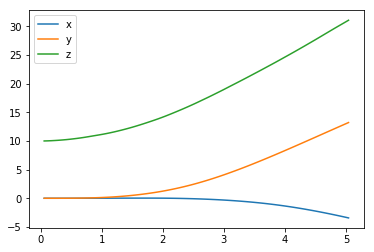

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

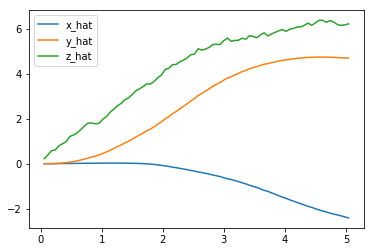

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

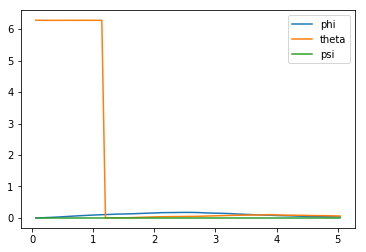

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

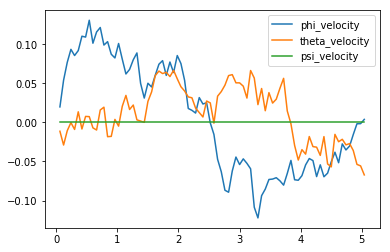

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

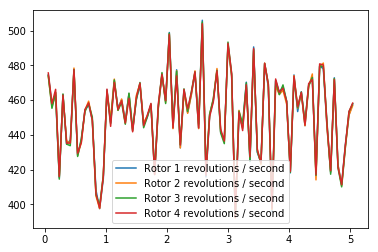

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -3.43122208  13.22294998  31.08661314   0.0341233    0.05900426   0.        ]
[-2.40790908  4.69339863  6.21245714]
[ 0.00382002 -0.06723474  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.467 (best =   0.332), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [33]:
## TODO: Train your agent here.

%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
from task import Task
from agent import DDPG
import math

num_episodes = 1000
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #Start in the sky

task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
cumReward = 0

labels = ['episode','cumReward']
results_DDPG = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    best_episode_reward = -float("inf")
    cumReward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        cumReward += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode] + [cumReward]
            for ii in range(len(labels)):
                results_DDPG[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Cum Reward = {:4f} \n".format(i_episode, best_episode_reward, best_reward, cumReward),"\n", end="")   # [debug]
            break
    sys.stdout.flush()
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1 Reward = 0.427465 Best Reward = 0.427465 Cum Reward = 1.675271 
 
Episode =    2 Reward = 0.522412 Best Reward = 0.522412 Cum Reward = 1.914885 
 
Episode =    3 Reward = 0.440872 Best Reward = 0.522412 Cum Reward = 1.651793 
 
Episode =    4 Reward = 0.867633 Best Reward = 0.867633 Cum Reward = 3.482994 
 
Episode =    5 Reward = 0.181165 Best Reward = 0.867633 Cum Reward = 2.037496 
 
Episode =    6 Reward = 0.282983 Best Reward = 0.867633 Cum Reward = 1.949455 
 
Episode =    7 Reward = 0.303013 Best Reward = 0.867633 Cum Reward = 3.355461 
 
Episode =    8 Reward = 0.658297 Best Reward = 0.867633 Cum Reward = 4.850879 
 
Episode =    9 Reward = 0.330339 Best Reward = 0.867633 Cum Reward = 3.655624 
 
Episode =   10 Reward = 0.445804 Best Reward = 0.867633 Cum Reward = 4.186075 
 
Episode =   11 Reward = 0.572918 Best Reward = 0.867633 Cum Reward = 4.682628 
 
Episode =   12 Reward

Episode =  102 Reward = 0.086024 Best Reward = 1.579157 Cum Reward = 2.153617 
 
Episode =  103 Reward = 0.087359 Best Reward = 1.579157 Cum Reward = 2.134499 
 
Episode =  104 Reward = 0.090491 Best Reward = 1.579157 Cum Reward = 2.302457 
 
Episode =  105 Reward = 0.083295 Best Reward = 1.579157 Cum Reward = 2.040287 
 
Episode =  106 Reward = 0.080733 Best Reward = 1.579157 Cum Reward = 1.954097 
 
Episode =  107 Reward = 0.086280 Best Reward = 1.579157 Cum Reward = 2.198438 
 
Episode =  108 Reward = 0.078756 Best Reward = 1.579157 Cum Reward = 1.897258 
 
Episode =  109 Reward = 0.082705 Best Reward = 1.579157 Cum Reward = 2.053283 
 
Episode =  110 Reward = 0.088807 Best Reward = 1.579157 Cum Reward = 2.202479 
 
Episode =  111 Reward = 0.084236 Best Reward = 1.579157 Cum Reward = 2.049991 
 
Episode =  112 Reward = 0.086427 Best Reward = 1.579157 Cum Reward = 2.139631 
 
Episode =  113 Reward = 0.084498 Best Reward = 1.579157 Cum Reward = 2.131661 
 
Episode =  114 Reward = 0.08

Episode =  204 Reward = 0.198314 Best Reward = 1.579157 Cum Reward = 2.561836 
 
Episode =  205 Reward = 0.220131 Best Reward = 1.579157 Cum Reward = 2.613598 
 
Episode =  206 Reward = 0.234314 Best Reward = 1.579157 Cum Reward = 3.228513 
 
Episode =  207 Reward = 0.230816 Best Reward = 1.579157 Cum Reward = 3.139940 
 
Episode =  208 Reward = 0.167970 Best Reward = 1.579157 Cum Reward = 2.516289 
 
Episode =  209 Reward = 0.237075 Best Reward = 1.579157 Cum Reward = 3.373338 
 
Episode =  210 Reward = 0.230356 Best Reward = 1.579157 Cum Reward = 3.291530 
 
Episode =  211 Reward = 0.197871 Best Reward = 1.579157 Cum Reward = 2.990401 
 
Episode =  212 Reward = 0.212294 Best Reward = 1.579157 Cum Reward = 3.153598 
 
Episode =  213 Reward = 0.224941 Best Reward = 1.579157 Cum Reward = 3.313894 
 
Episode =  214 Reward = 0.209240 Best Reward = 1.579157 Cum Reward = 3.140513 
 
Episode =  215 Reward = 0.222934 Best Reward = 1.579157 Cum Reward = 3.224636 
 
Episode =  216 Reward = 0.23

Episode =  306 Reward = 0.193653 Best Reward = 1.579157 Cum Reward = 2.981293 
 
Episode =  307 Reward = 0.236170 Best Reward = 1.579157 Cum Reward = 3.349331 
 
Episode =  308 Reward = 0.239993 Best Reward = 1.579157 Cum Reward = 3.478244 
 
Episode =  309 Reward = 0.237296 Best Reward = 1.579157 Cum Reward = 3.422056 
 
Episode =  310 Reward = 0.194510 Best Reward = 1.579157 Cum Reward = 2.967581 
 
Episode =  311 Reward = 0.223861 Best Reward = 1.579157 Cum Reward = 3.229428 
 
Episode =  312 Reward = 0.217394 Best Reward = 1.579157 Cum Reward = 3.173552 
 
Episode =  313 Reward = 0.246188 Best Reward = 1.579157 Cum Reward = 3.453143 
 
Episode =  314 Reward = 0.222862 Best Reward = 1.579157 Cum Reward = 3.287409 
 
Episode =  315 Reward = 0.233750 Best Reward = 1.579157 Cum Reward = 3.413261 
 
Episode =  316 Reward = 0.245339 Best Reward = 1.579157 Cum Reward = 3.460544 
 
Episode =  317 Reward = 0.235963 Best Reward = 1.579157 Cum Reward = 3.460607 
 
Episode =  318 Reward = 0.23

Episode =  408 Reward = 0.217407 Best Reward = 1.579157 Cum Reward = 3.212763 
 
Episode =  409 Reward = 0.217972 Best Reward = 1.579157 Cum Reward = 3.199279 
 
Episode =  410 Reward = 0.220863 Best Reward = 1.579157 Cum Reward = 3.324571 
 
Episode =  411 Reward = 0.207527 Best Reward = 1.579157 Cum Reward = 3.090132 
 
Episode =  412 Reward = 0.221806 Best Reward = 1.579157 Cum Reward = 3.216658 
 
Episode =  413 Reward = 0.227102 Best Reward = 1.579157 Cum Reward = 3.331368 
 
Episode =  414 Reward = 0.231796 Best Reward = 1.579157 Cum Reward = 3.311487 
 
Episode =  415 Reward = 0.228837 Best Reward = 1.579157 Cum Reward = 3.379579 
 
Episode =  416 Reward = 0.247108 Best Reward = 1.579157 Cum Reward = 3.474289 
 
Episode =  417 Reward = 0.209484 Best Reward = 1.579157 Cum Reward = 3.111183 
 
Episode =  418 Reward = 0.207509 Best Reward = 1.579157 Cum Reward = 3.120649 
 
Episode =  419 Reward = 0.232314 Best Reward = 1.579157 Cum Reward = 3.380360 
 
Episode =  420 Reward = 0.21

Episode =  510 Reward = 0.226689 Best Reward = 1.579157 Cum Reward = 3.273968 
 
Episode =  511 Reward = 0.237372 Best Reward = 1.579157 Cum Reward = 3.438192 
 
Episode =  512 Reward = 0.241762 Best Reward = 1.579157 Cum Reward = 3.405421 
 
Episode =  513 Reward = 0.223472 Best Reward = 1.579157 Cum Reward = 3.238232 
 
Episode =  514 Reward = 0.230088 Best Reward = 1.579157 Cum Reward = 3.362457 
 
Episode =  515 Reward = 0.228392 Best Reward = 1.579157 Cum Reward = 3.367693 
 
Episode =  516 Reward = 0.225662 Best Reward = 1.579157 Cum Reward = 3.333476 
 
Episode =  517 Reward = 0.241687 Best Reward = 1.579157 Cum Reward = 3.463967 
 
Episode =  518 Reward = 0.244959 Best Reward = 1.579157 Cum Reward = 3.499075 
 
Episode =  519 Reward = 0.197642 Best Reward = 1.579157 Cum Reward = 3.044281 
 
Episode =  520 Reward = 0.214715 Best Reward = 1.579157 Cum Reward = 3.206199 
 
Episode =  521 Reward = 0.248745 Best Reward = 1.579157 Cum Reward = 3.406393 
 
Episode =  522 Reward = 0.22

Episode =  612 Reward = 0.285081 Best Reward = 1.579157 Cum Reward = 6.914660 
 
Episode =  613 Reward = 0.285109 Best Reward = 1.579157 Cum Reward = 7.469223 
 
Episode =  614 Reward = 0.285092 Best Reward = 1.579157 Cum Reward = 6.532085 
 
Episode =  615 Reward = 0.285094 Best Reward = 1.579157 Cum Reward = 7.286798 
 
Episode =  616 Reward = 0.285098 Best Reward = 1.579157 Cum Reward = 8.548603 
 
Episode =  617 Reward = 0.285100 Best Reward = 1.579157 Cum Reward = 7.213432 
 
Episode =  618 Reward = 0.285114 Best Reward = 1.579157 Cum Reward = 6.703928 
 
Episode =  619 Reward = 0.285105 Best Reward = 1.579157 Cum Reward = 6.843555 
 
Episode =  620 Reward = 0.285113 Best Reward = 1.579157 Cum Reward = 7.219535 
 
Episode =  621 Reward = 0.285092 Best Reward = 1.579157 Cum Reward = 7.541417 
 
Episode =  622 Reward = 0.285111 Best Reward = 1.579157 Cum Reward = 6.849206 
 
Episode =  623 Reward = 0.285107 Best Reward = 1.579157 Cum Reward = 8.015294 
 
Episode =  624 Reward = 0.28

Episode =  714 Reward = 0.285119 Best Reward = 1.579157 Cum Reward = 6.924196 
 
Episode =  715 Reward = 0.285067 Best Reward = 1.579157 Cum Reward = 6.111508 
 
Episode =  716 Reward = 0.285105 Best Reward = 1.579157 Cum Reward = 6.440276 
 
Episode =  717 Reward = 0.285107 Best Reward = 1.579157 Cum Reward = 7.689498 
 
Episode =  718 Reward = 0.285101 Best Reward = 1.579157 Cum Reward = 7.540246 
 
Episode =  719 Reward = 0.285090 Best Reward = 1.579157 Cum Reward = 7.747952 
 
Episode =  720 Reward = 0.285094 Best Reward = 1.579157 Cum Reward = 6.414298 
 
Episode =  721 Reward = 0.285095 Best Reward = 1.579157 Cum Reward = 7.076986 
 
Episode =  722 Reward = 0.285092 Best Reward = 1.579157 Cum Reward = 7.960370 
 
Episode =  723 Reward = 0.285120 Best Reward = 1.579157 Cum Reward = 7.036413 
 
Episode =  724 Reward = 0.285110 Best Reward = 1.579157 Cum Reward = 6.252969 
 
Episode =  725 Reward = 0.285116 Best Reward = 1.579157 Cum Reward = 7.372690 
 
Episode =  726 Reward = 0.28

Episode =  816 Reward = 0.285111 Best Reward = 1.579157 Cum Reward = 7.436064 
 
Episode =  817 Reward = 0.285109 Best Reward = 1.579157 Cum Reward = 6.913706 
 
Episode =  818 Reward = 0.285107 Best Reward = 1.579157 Cum Reward = 7.680606 
 
Episode =  819 Reward = 0.285100 Best Reward = 1.579157 Cum Reward = 8.031962 
 
Episode =  820 Reward = 0.285107 Best Reward = 1.579157 Cum Reward = 8.013948 
 
Episode =  821 Reward = 0.285112 Best Reward = 1.579157 Cum Reward = 8.360284 
 
Episode =  822 Reward = 0.285112 Best Reward = 1.579157 Cum Reward = 6.556151 
 
Episode =  823 Reward = 0.285118 Best Reward = 1.579157 Cum Reward = 6.393872 
 
Episode =  824 Reward = 0.285102 Best Reward = 1.579157 Cum Reward = 7.214265 
 
Episode =  825 Reward = 0.285109 Best Reward = 1.579157 Cum Reward = 6.493504 
 
Episode =  826 Reward = 0.285103 Best Reward = 1.579157 Cum Reward = 8.307953 
 
Episode =  827 Reward = 0.285090 Best Reward = 1.579157 Cum Reward = 8.459618 
 
Episode =  828 Reward = 0.28

Episode =  918 Reward = 0.285103 Best Reward = 1.579157 Cum Reward = 8.367827 
 
Episode =  919 Reward = 0.285106 Best Reward = 1.579157 Cum Reward = 5.713819 
 
Episode =  920 Reward = 0.285104 Best Reward = 1.579157 Cum Reward = 8.636003 
 
Episode =  921 Reward = 0.285115 Best Reward = 1.579157 Cum Reward = 8.122145 
 
Episode =  922 Reward = 0.285106 Best Reward = 1.579157 Cum Reward = 6.311222 
 
Episode =  923 Reward = 0.285102 Best Reward = 1.579157 Cum Reward = 7.593594 
 
Episode =  924 Reward = 0.285105 Best Reward = 1.579157 Cum Reward = 6.512531 
 
Episode =  925 Reward = 0.285108 Best Reward = 1.579157 Cum Reward = 8.649422 
 
Episode =  926 Reward = 0.285118 Best Reward = 1.579157 Cum Reward = 6.574220 
 
Episode =  927 Reward = 0.285105 Best Reward = 1.579157 Cum Reward = 7.979335 
 
Episode =  928 Reward = 0.285118 Best Reward = 1.579157 Cum Reward = 8.386786 
 
Episode =  929 Reward = 0.285082 Best Reward = 1.579157 Cum Reward = 5.666043 
 
Episode =  930 Reward = 0.28

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

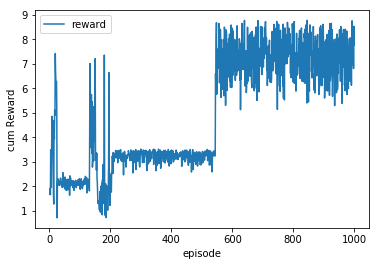

In [34]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results_DDPG['episode'],results_DDPG['cumReward'], label='reward')
plt.xlabel('episode')
plt.ylabel('cum Reward')
plt.legend()

In [35]:
last_mean = np.mean(results_DDPG['cumReward'][-10:])
print("The mean over the last 10 episodes is: ",last_mean)
first_mean = np.mean(results_DDPG['cumReward'][:10])
print("The mean over the first 10 episodes is: ",first_mean)

The mean over the last 10 episodes is:  7.64697992078
The mean over the first 10 episodes is:  2.87599339984


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I used the task class in task.py file.

The Task class consists the parameters:                                                                                         1. initial position of the quadcopter in (x,y,z) dimensions and the Euler angles
2. initial velocity of the quadcopter in (x,y,z) dimensions
3. initial radians/second for each of the three Euler angles
4. time limit for each episode
5. target/goal (x,y,z) position for the agent

I focused on the landing of the quardcopter which starts at an intial postion of 10 and lands on the ground.I trained mutliple times but but had very bad results using the reward function. That is when i had to penalize the reward function based on the angular velocity and pythogrian distance.




**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
As described in the project I used the DDPG Algortitm to train the qudracopter.

I used the theta = 0.085 , sigma =0.2 , gamma =0.70 and tau =0.01

I did not change the neural network configuration as it looks the best layered approrach.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I would say this was a difficult task to learn and there are lot of parameter that controls the qudracopter.

It was a gradual learning for the qudracopter which learnt over the training period of the 1000 episodes.After 600 epsiodes it keeps oscillating between 5 and 10.

Yes the final performance was better than the pervious case when we used the basic task.The mean over the last 10 episodes is:  7.64697992078

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I was really cluseless when i started off the project. I went through the concepts multiple times but still I feel i am not confident in approaching the task. Most of the code was already provide i used them and tweked to get the result.Fnally I would say i still need to work to get better results.

The intresting thing is no matter how well you train there are multiple parameter that effect the qudracopter, this says WELCOME to the real world of machine learning.